In [1]:
# hyperthelia_3_merged.ipynb — Measurement + View/Export

# ===  SETUP: Mount Google Drive ===
from google.colab import drive
from pathlib import Path
import sys
import importlib

drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
# ===  CONFIG: User project settings ===
BASE_PROJECT_DIR = Path("/content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/")
LIB_DIR = BASE_PROJECT_DIR / "notebooks" / "lib"
OUTPUTS_DIR = BASE_PROJECT_DIR / "outputs"
RAW_INTENSITY_DIR = BASE_PROJECT_DIR / "raw_intensity"
EXPORT_DIR = BASE_PROJECT_DIR / "image_exports"

# ===  USER TOGGLES ===
is_tracked = True
compute_surface = True
enable_intensity_measurement = False
intensity_channel_mode = "folder"
force = False

In [34]:
# === 🧠 LIBRARY SETUP ===
if str(LIB_DIR) not in sys.path:
    sys.path.insert(0, str(LIB_DIR))

import importlib
import measurement
import measurevisualise
importlib.reload(measurevisualise)
importlib.reload(measurement)


<module 'measurement' from '/content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/notebooks/lib/measurement.py'>

In [35]:

# ===  DISCOVER EXPERIMENTS ===
experiment_data = measurement.discover_experiments(OUTPUTS_DIR, is_tracked=is_tracked)
measurement.summarise_experiment_data(experiment_data)




📊 Summary of discovered experiments
📁 Total experiments: 1
🧮 Total TIFFs: 6



,experiment,n_tiffs
0,ITB1cell3,6


In [24]:

# # ===  DETECT INTENSITY CHANNELS (OPTIONAL) ===
# intensity_dict = None
# if enable_intensity_measurement:
#     from collections import defaultdict
#     import tifffile

#     intensity_dict = {}
#     for channel_folder in sorted(RAW_INTENSITY_DIR.glob("*/")):
#         channel_name = channel_folder.name
#         tiff_paths = sorted(channel_folder.glob("*.tif"))
#         if not tiff_paths:
#             print(f" Skipping empty channel: {channel_name}")
#             continue
#         intensity_dict[channel_name] = tiff_paths

#     print(f"🧪 Found intensity channels: {list(intensity_dict.keys())}")


In [37]:

measurement.run_all_measurements(
    experiment_data=experiment_data,
    is_tracked=is_tracked,
    compute_surface=compute_surface,
    enable_intensity_measurement=enable_intensity_measurement,
    intensity_dir=RAW_INTENSITY_DIR,
    force=force
)


# # === 🧬 RUN MEASUREMENT ===
# measurement.run_all_measurements(
#     experiment_data=experiment_data,
#     is_tracked=is_tracked,
#     compute_surface=compute_surface,
#     intensity_dict=intensity_dict,
#     force=force
# )


🧪 Measuring experiment: ITB1cell3


   Timepoints for ITB1cell3: 100%|██████████| 6/6 [02:26<00:00, 24.43s/it]

✅ Saved: /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs/outputs_ITB1cell3/measured/regionprops_ITB1cell3_tracked.csv


In [27]:


# ===  MEASURED DATA VISUALIZATION AND EXPORT ===

# ===  LIST AVAILABLE MEASUREMENT CSVs ===
measurevisualise.list_available_measurement_csvs(BASE_PROJECT_DIR)



📋 Available measurement CSVs:
- outputs/outputs_ITB1cell3/measured/regionprops_ITB1cell3_tracked.csv



📊 Viewing experiment: ITB1cell3
   Timepoint: 0, Z-Slice: 19
   Value to color by: elongation
   Image path: /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs/outputs_ITB1cell3/tracking/full_masks/propagated_t000.tif
   CSV path: /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs/outputs_ITB1cell3/measured/regionprops_ITB1cell3_tracked.csv


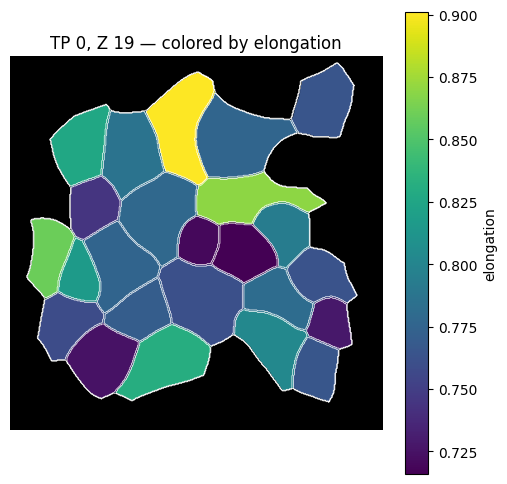

In [31]:

# ===  CHOOSE ONE MEASUREMENT CSV TO EXPLORE ===
csv_path = BASE_PROJECT_DIR / "outputs/outputs_ITB1cell3/measured/regionprops_ITB1cell3_tracked.csv"

# ===  VIEW A MEASUREMENT OVERLAY ===
timepoint = 0
z_slice = 19
value_column = "elongation"  # or e.g. "intensity_mean_C1", "elongation", etc.

measurevisualise.view_by_csv(
    csv_path=csv_path,
    base_dir=BASE_PROJECT_DIR,
    timepoint=timepoint,
    z=z_slice,
    value_column=value_column
)